In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [24]:
dset = pd.read_csv('soneta.csv')
print(dset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [25]:
dset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [26]:
dset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [27]:
dset.groupby(['Gender'])['Purchased'].sum()

Gender
Female    77
Male      66
Name: Purchased, dtype: int64

In [28]:
dset.groupby(['Gender'])['EstimatedSalary'].mean()

Gender
Female    71759.803922
Male      67642.857143
Name: EstimatedSalary, dtype: float64

In [29]:
cdta= dset.drop(['User ID'], axis=1)

In [30]:
cdta['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [31]:
cdta

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
logR_model1= LogisticRegression()

In [34]:
x_train, x_test, y_train, y_test= train_test_split(cdta.Age, cdta.Purchased, test_size =0.2)

In [35]:
len(x_train), len(x_test)

(320, 80)

In [36]:
logR_model1.fit(np.array(x_train).reshape(-1,1), y_train)

LogisticRegression()

In [37]:
logR_model1.score(np.array(x_test).reshape(-1,1), y_test)

0.85

In [38]:
y_pred= logR_model1.predict(np.array(x_test).reshape(-1,1))

In [39]:
con_m= confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Actual Data')

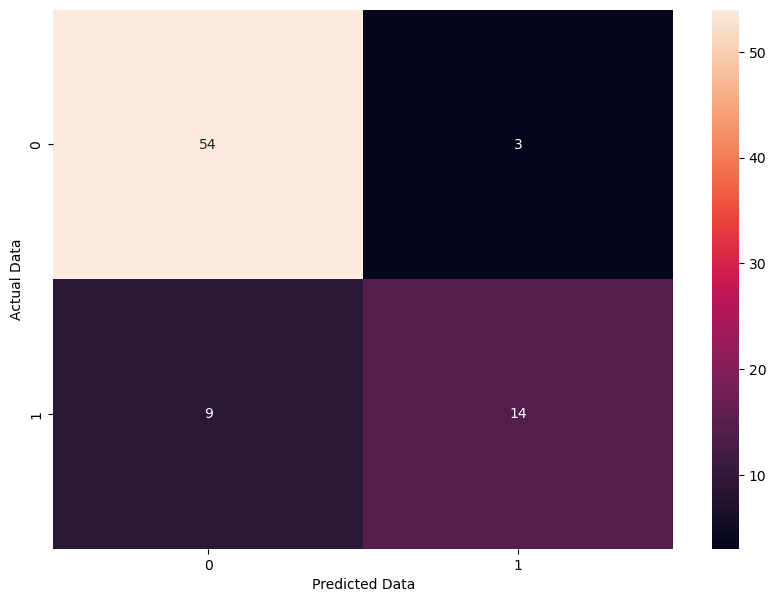

In [40]:
plt.figure(figsize=(10,7))
sb.heatmap(con_m, annot= True)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')

In [43]:
TP = con_m[1, 1]
FP = con_m[0, 1]
TN = con_m[0, 0]
FN = con_m[1, 0]

In [44]:
print("True Positive:",TP)
print("False Positive:",FP)
print("True Negative:",TN)
print("False Negative:",FN)

True Positive: 14
False Positive: 3
True Negative: 54
False Negative: 9


In [46]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print("ACcuracy:",Accuracy)

ACcuracy: 0.85


In [47]:
ER=(FP+FN)/(TP+TN+FP+FN)
print("")